In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime as dt
import yfinance as yf

In [65]:
# download data
stocks = ['^NSEI', 'TATACONSUM']

ohlc_mon = {}
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()
for ticker in stocks:
    ohlc_mon[ticker] = yf.download(ticker, start=start, end= end, interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TATACONSUM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [66]:
# ohlc_mon

In [67]:
# CAGR 
def CAGR(DF):
    df = DF.copy()
    n  = len(df)/12
    df['cum_return'] = (1+ df['mon_ret']).cumprod()
    return (df['cum_return'].tolist()[-1])**(1/n) -1

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [68]:
DF = pd.DataFrame()

DF['mon_ret'] = ohlc_mon['^NSEI']['Close'].pct_change()
DF["cum_ret"] = (1 + DF["mon_ret"]).cumprod()
CAGR(DF)*100, max_dd(DF)*100

(11.836333952728161, 29.343919217321496)

In [69]:
mon_data = copy.deepcopy(ohlc_mon)

In [11]:
nifty50 = ['BAJAJ-AUTO.NS',
'COALINDIA.NS',
'BHARTIARTL.NS',
'TATAMOTORS.NS',
'SUNPHARMA.NS',
'ICICIBANK.NS',
'BAJAJFINSV.NS',
'M&M.NS',
'HEROMOTOCO.NS',
'BPCL.NS',
'JSWSTEEL.NS',
'POWERGRID.NS',
'HINDUNILVR.NS',
'ULTRACEMCO.NS',
'INDUSINDBK.NS',
'ADANIPORTS.NS',
'ITC.NS',
'APOLLOHOSP.NS',
'HDFCLIFE.NS',
'TATASTEEL.NS',
'NTPC.NS',
'RELIANCE.NS',
'MARUTI.NS',
'HINDALCO.NS',
'KOTAKBANK.NS',
'BAJFINANCE.NS',
'SBILIFE.NS',
'AXISBANK.NS',
'TECHM.NS',
'LT.NS',
'HDFCBANK.NS',
'DRREDDY.NS',
'NESTLEIND.NS',
'GRASIM.NS',
'SHRIRAMFIN.NS',
'SBIN.NS',
'CIPLA.NS',
'ADANIENT.NS',
'TCS.NS',
'EICHERMOT.NS',
'INFY.NS',
'HCLTECH.NS',
'TATACONSUM.NS',
'BRITANNIA.NS',
'DIVISLAB.NS',
'TITAN.NS',
'ASIANPAINT.NS',
'ONGC.NS',
'WIPRO.NS',
'LTIM.NS']

In [49]:
# download data
ohlc_mon_nifty50 = {}
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()
for ticker in nifty50:
    ohlc_mon_nifty50[ticker] = yf.download(ticker, start=start, end= end, interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [50]:
tickers = ohlc_mon_nifty50.keys()

In [54]:
# Backtesting

# calculating monthly return of each stock and consolidating returns in separate data frame

ohlc_dict = copy.deepcopy(ohlc_mon_nifty50)
return_df = pd.DataFrame()

In [55]:
for ticker in tickers:
    ohlc_dict[ticker]['mon_ret'] = ohlc_dict[ticker]['Close'].pct_change() 
    return_df[ticker] = ohlc_dict[ticker]['mon_ret']

# return_df.dropna(inplace = True)

In [56]:
# ohlc_dict
return_df

,BAJAJ-AUTO.NS,COALINDIA.NS,BHARTIARTL.NS,TATAMOTORS.NS,SUNPHARMA.NS,ICICIBANK.NS,BAJAJFINSV.NS,M&M.NS,HEROMOTOCO.NS,BPCL.NS,...,INFY.NS,HCLTECH.NS,TATACONSUM.NS,BRITANNIA.NS,DIVISLAB.NS,TITAN.NS,ASIANPAINT.NS,ONGC.NS,WIPRO.NS,LTIM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,0.011394,-0.041965,-0.041614,-0.004386,-0.006742,0.078536,0.076988,0.013436,0.027135,0.029665,...,0.076174,0.033543,0.007495,0.076529,-0.078752,-0.057560,0.133486,-0.063557,0.039205,NaN
2014-12-01,-0.078897,0.081268,-0.077426,-0.071134,-0.015660,0.006327,0.136494,-0.067460,-0.012947,-0.134338,...,-0.095129,-0.039372,-0.064166,0.116599,-0.002633,0.029122,0.010205,-0.100290,-0.052236,NaN
2015-01-01,-0.016753,-0.059919,0.059541,0.180809,0.110338,0.021524,0.106986,0.024829,-0.077624,0.159211,...,0.085853,0.122018,0.051342,0.026575,0.011084,0.128259,0.140170,0.029295,0.092489,NaN
2015-02-01,-0.100849,0.095330,-0.049505,-0.017090,-0.042332,-0.070557,-0.017547,0.012173,-0.067318,-0.006143,...,0.057823,0.128506,-0.016698,0.102938,-0.024765,0.011031,-0.058992,-0.075708,0.078724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.026727,0.046533,0.076266,0.015210,-0.073093,0.052227,-0.017550,0.122310,-0.037958,0.008217,...,-0.051734,-0.114638,0.011084,-0.027549,0.161699,-0.055908,0.010240,0.055214,-0.036867,-0.046979
2024-05-01,0.020340,0.081224,0.038153,-0.084235,-0.028161,-0.025513,-0.053498,0.162265,0.126908,0.033671,...,-0.009609,-0.031099,-0.043398,0.084559,0.076154,-0.096775,0.001843,-0.065406,-0.052336,-0.000956
2024-06-01,0.045890,-0.036747,0.051940,0.072319,0.041821,0.070068,0.038957,0.143800,0.089851,-0.031698,...,0.113619,0.102334,0.035086,0.057097,0.067155,0.050063,0.012443,0.037261,0.174920,0.145292


In [57]:
# function to calculate iterative return 

def pflio(DF, m, x):
    df = DF.copy()
    portfolio = ['BAJAJ-AUTO.NS','COALINDIA.NS','BHARTIARTL.NS','TATAMOTORS.NS','SUNPHARMA.NS','ICICIBANK.NS','BAJAJFINSV.NS','M&M.NS','HEROMOTOCO.NS','BPCL.NS',]
    monthly_ret = [0]
    for i in range(len(df)):
        if len(portfolio)>0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending = True)[:x].index.values.tolist()
            portfolio = [ t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending= False)[:fill].index.values.tolist()
        portfolio = new_picks +  portfolio
        # print(portfolio)
        monthly_ret_df = pd.DataFrame(np.array(monthly_ret), columns=['mon_ret'])
    return monthly_ret_df

In [58]:
CAGR(pflio(return_df, 10, 3))

0.17101613841098606

In [59]:
return_df.columns

Index(['BAJAJ-AUTO.NS', 'COALINDIA.NS', 'BHARTIARTL.NS', 'TATAMOTORS.NS',
       'SUNPHARMA.NS', 'ICICIBANK.NS', 'BAJAJFINSV.NS', 'M&M.NS',
       'HEROMOTOCO.NS', 'BPCL.NS', 'JSWSTEEL.NS', 'POWERGRID.NS',
       'HINDUNILVR.NS', 'ULTRACEMCO.NS', 'INDUSINDBK.NS', 'ADANIPORTS.NS',
       'ITC.NS', 'APOLLOHOSP.NS', 'HDFCLIFE.NS', 'TATASTEEL.NS', 'NTPC.NS',
       'RELIANCE.NS', 'MARUTI.NS', 'HINDALCO.NS', 'KOTAKBANK.NS',
       'BAJFINANCE.NS', 'SBILIFE.NS', 'AXISBANK.NS', 'TECHM.NS', 'LT.NS',
       'HDFCBANK.NS', 'DRREDDY.NS', 'NESTLEIND.NS', 'GRASIM.NS',
       'SHRIRAMFIN.NS', 'SBIN.NS', 'CIPLA.NS', 'ADANIENT.NS', 'TCS.NS',
       'EICHERMOT.NS', 'INFY.NS', 'HCLTECH.NS', 'TATACONSUM.NS',
       'BRITANNIA.NS', 'DIVISLAB.NS', 'TITAN.NS', 'ASIANPAINT.NS', 'ONGC.NS',
       'WIPRO.NS', 'LTIM.NS'],
      dtype='object')

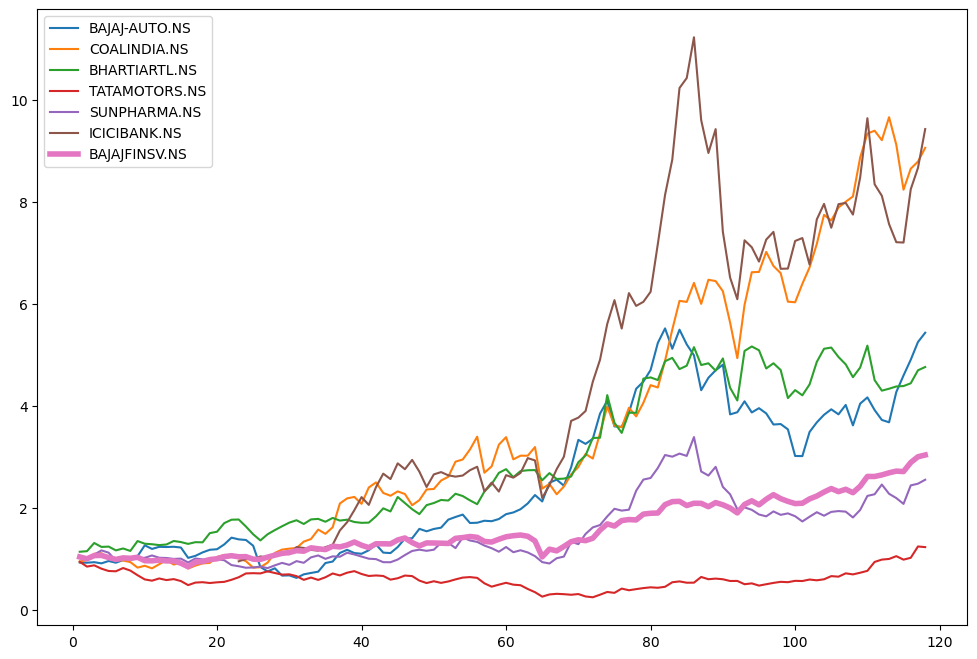

In [78]:
#visualization
fig, ax = plt.subplots(figsize = (12,8))
# plt.plot((return_df))
# plt.plot((1+pflio(return_df,10,3)).cumprod())
plt.plot((1+return_df[['DIVISLAB.NS', 'TITAN.NS', 'ASIANPAINT.NS', 'ONGC.NS',
       'WIPRO.NS', 'LTIM.NS']].reset_index(drop=True)).cumprod())
plt.plot((1+DF['mon_ret'].reset_index(drop=True)).cumprod(),label = 'NIFTY', linewidth = 4)
# plt.title("Index Return vs Strategy Return")
# plt.ylabel("cumulative return")
# plt.xlabel("months")
ax.legend(return_df);
plt.show()

In [21]:
# #visualization
# fig, ax = plt.subplots(figsize = (12,8))
# plt.plot((1+pflio(return_df,10,3)).cumprod())
# plt.plot((1+DF['mon_ret'].reset_index(drop=True)).cumprod())
# plt.title("Index Return vs Strategy Return")
# plt.ylabel("cumulative return")
# plt.xlabel("months")
# ax.legend(["Strategy Return","Index Return"]);